<h1> <center>Project NLP Sarcasm Classifier </center></h1>

# Data Analysis

## Contexte of data

Description: Sarcasm, a sharp and ironic utterance designed to cut or cause pain, is often
used to express strong emotions, such as contempt, mockery or bitterness. Sarcasm
detection is of great importance in understanding people’s true sentiments and opinions.

The goal of this project is to train an NLP model to predict if a given text is sarcastic.

#### **Sarcasm**: 

is the caustic use of words, often in a humorous way, to mock someone or something.[1] Sarcasm may employ ambivalence,[2] although it is not necessarily ironic.

#### **Content** :

Each record consists of three attributes:

- is_sarcastic: 1 if the record is sarcastic otherwise 0

- headline: the headline of the news article

article_link: link to the original news article. Useful in collecting supplementary data

#### **Task** :

In this project we will develop a very simple way to predict from a set of data from newspaper headlines if the sentences in question are sarcastic ... or not!

## Importation libraries

In [ ]:
import json
import pandas as pd
import random
import nltk
import tensorflow as tf
import seaborn as sns
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report,confusion_matrix
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.text import text_to_word_sequence
from tensorflow.keras.preprocessing.sequence import pad_sequences
from nltk import word_tokenize
import numpy as np

##  Reading data

In [ ]:
def parse_data(file):
    for l in open(file,'r'):
        yield json.loads(l)

data = list(parse_data('/content/drive/MyDrive/Sarcasm_Headlines_Dataset.json'))

In [ ]:
data

[{'article_link': 'https://www.huffingtonpost.com/entry/versace-black-code_us_5861fbefe4b0de3a08f600d5',
  'headline': "former versace store clerk sues over secret 'black code' for minority shoppers",
  'is_sarcastic': 0},
 {'article_link': 'https://www.huffingtonpost.com/entry/roseanne-revival-review_us_5ab3a497e4b054d118e04365',
  'headline': "the 'roseanne' revival catches up to our thorny political mood, for better and worse",
  'is_sarcastic': 0},
 {'article_link': 'https://local.theonion.com/mom-starting-to-fear-son-s-web-series-closest-thing-she-1819576697',
  'headline': "mom starting to fear son's web series closest thing she will have to grandchild",
  'is_sarcastic': 1},
 {'article_link': 'https://politics.theonion.com/boehner-just-wants-wife-to-listen-not-come-up-with-alt-1819574302',
  'headline': 'boehner just wants wife to listen, not come up with alternative debt-reduction ideas',
  'is_sarcastic': 1},
 {'article_link': 'https://www.huffingtonpost.com/entry/jk-rowling-w

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Visualisation des données

In [ ]:
count=0
for item in data :
    count = count+1
print('There are',count,"the headline of the news articles")

There are 26709 the headline of the news articles


In [ ]:
# Number for sarcist and no sarcastic

count_0=0
count_1=0
for item in data :
    if item['is_sarcastic'] == 0 :
        count_0 = count_0 + 1
    elif item['is_sarcastic'] == 1:
        count_1 = count_1 + 1
    else :
        print('no position')
print('there are ',count_0,'record sarcastic')
print('there are ',count_1,"record non sarcastic")

there are  14985 record sarcastic
there are  11724 record non sarcastic


In [ ]:
#convertion data to dataframe

dataframe = pd.DataFrame(data)
dataframe

,article_link,headline,is_sarcastic
0,https://www.huffingtonpost.com/entry/versace-b...,former versace store clerk sues over secret 'b...,0
1,https://www.huffingtonpost.com/entry/roseanne-...,the 'roseanne' revival catches up to our thorn...,0
2,https://local.theonion.com/mom-starting-to-fea...,mom starting to fear son's web series closest ...,1
3,https://politics.theonion.com/boehner-just-wan...,"boehner just wants wife to listen, not come up...",1
4,https://www.huffingtonpost.com/entry/jk-rowlin...,j.k. rowling wishes snape happy birthday in th...,0
...,...,...,...
26704,https://www.huffingtonpost.com/entry/american-...,american politics in moral free-fall,0
26705,https://www.huffingtonpost.com/entry/americas-...,america's best 20 hikes,0
26706,https://www.huffingtonpost.com/entry/reparatio...,reparations and obama,0
26707,https://www.huffingtonpost.com/entry/israeli-b...,israeli ban targeting boycott supporters raise...,0


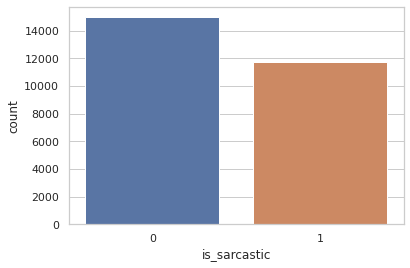

In [ ]:
#graphic visualisation for sarcastic and no sarcastic

sns.set_theme(style="whitegrid")
sns.countplot(x = 'is_sarcastic', data = dataframe);

In [ ]:
#convertion dataframe to numpy for manipulation data

labels = np.array(dataframe.is_sarcastic)
sentences = np.array(dataframe.headline)
print('Number of sentences and labels: ', len(labels), len(sentences))

Number of sentences and labels:  26709 26709


In [ ]:
# Spliting data train and test

x_train, x_test, y_train, y_test = train_test_split(sentences, labels, test_size=0.2)
print('Train and Test set distribution: ', len(x_train), len(x_test), len(y_train), len(y_test))

Train and Test set distribution:  21367 5342 21367 5342


### Tokenisation

In [ ]:
# Definition of Parameters
# -------------------------------
vocab_size= 10000 # Maximum size of the dataset's vocabulary corpus
embedding_dim=32 # Number of embedding dimensions to qualify a word
max_length = 32 # Maximum length in words of titles before truncating
trunc_type='post' # Method to truncate if overflow (before or after)
padding_type='post' # Padding parameter (after sentence)
oov_tok='<OOV>' # Token to use when a word is missing

In [ ]:
# Instantiating the Tokenizer with parameters
tokenizer = Tokenizer(num_words=vocab_size,oov_token=oov_tok)

# Adaptation of the Tokenizer to the training game
tokenizer.fit_on_texts(x_train)

# Creating a word index dictionary
word_index = tokenizer.word_index

# Conversion to integer sequences
x_train_sequences = tokenizer.texts_to_sequences(x_train)

# Added padding
# Objective: allow each sequence to have the same length
x_train_padded = pad_sequences(x_train_sequences, maxlen = max_length, padding = padding_type)

# Treatment of the test game identical to the training game
x_test_sequences = tokenizer.texts_to_sequences(x_test)
x_test_padded = pad_sequences(x_test_sequences, maxlen = max_length, truncating = trunc_type)


## Creating the Recurrent Neural Network : CNN

In [ ]:
# Definition of Parameters for Model
# -------------------------------

number_of_epochs = 10
#lstm1_dim = 64
#lstm2_dim = 32
#gru_dim = 32
filters = 128
kernel_size = 5
lr = 0.0001

In [ ]:
# Building model

model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length = max_length),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv1D(filters, kernel_size, activation='relu'),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(128, activation = 'relu'),
    tf.keras.layers.Dropout(0.5),
    #tf.keras.layers.Dense(64, activation = 'relu'),
    #tf.keras.layers.Dropout(0.25),
    #tf.keras.layers.Dense(34, activation = 'relu'),
    #tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1, activation = 'sigmoid'),
])

In [ ]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, 32, 32)            320000    
                                                                 
 dropout_13 (Dropout)        (None, 32, 32)            0         
                                                                 
 conv1d_5 (Conv1D)           (None, 28, 128)           20608     
                                                                 
 global_average_pooling1d_5   (None, 128)              0         
 (GlobalAveragePooling1D)                                        
                                                                 
 dense_13 (Dense)            (None, 128)               16512     
                                                                 
 dropout_14 (Dropout)        (None, 128)               0         
                                                      

In [ ]:
model.compile(
    loss = 'binary_crossentropy',
    optimizer = tf.keras.optimizers.Adam(learning_rate = lr),
    metrics = ['accuracy']
)

In [ ]:
# raining
history = model.fit(x_train_padded, y_train, epochs = number_of_epochs, validation_data=(x_test_padded, y_test), verbose=1)

Epoch 1/10
668/668 [==============================] - 9s 12ms/step - loss: 0.6814 - accuracy: 0.5615 - val_loss: 0.6547 - val_accuracy: 0.6058
Epoch 2/10
668/668 [==============================] - 8s 12ms/step - loss: 0.5291 - accuracy: 0.7454 - val_loss: 0.4504 - val_accuracy: 0.7851
Epoch 3/10
668/668 [==============================] - 8s 11ms/step - loss: 0.3722 - accuracy: 0.8405 - val_loss: 0.4172 - val_accuracy: 0.7980
Epoch 4/10
668/668 [==============================] - 8s 12ms/step - loss: 0.3087 - accuracy: 0.8743 - val_loss: 0.4102 - val_accuracy: 0.8053
Epoch 5/10
668/668 [==============================] - 8s 12ms/step - loss: 0.2706 - accuracy: 0.8910 - val_loss: 0.4198 - val_accuracy: 0.8055
Epoch 6/10
668/668 [==============================] - 8s 12ms/step - loss: 0.2399 - accuracy: 0.9057 - val_loss: 0.4125 - val_accuracy: 0.8117
Epoch 7/10
668/668 [==============================] - 8s 12ms/step - loss: 0.2182 - accuracy: 0.9159 - val_loss: 0.4440 - val_accuracy: 0.8016

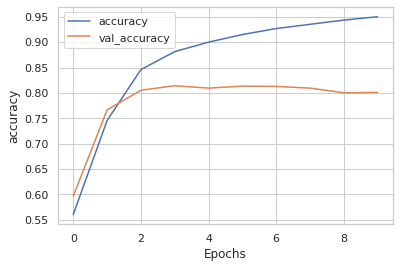

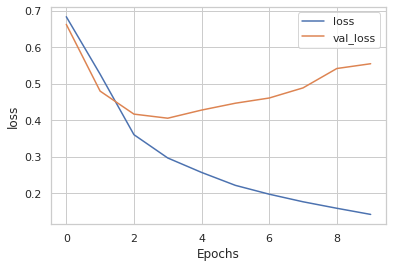

In [ ]:
# Plot utility
def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_'+string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.legend([string, 'val_'+string])
    plt.show()
    
# Plot the accuracy and loss
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

## Evaluation

In [ ]:
print('Accuracy on test set: ', model.evaluate(x_test_padded,y_test)[1]*100)

167/167 [==============================] - 1s 3ms/step - loss: 0.5552 - accuracy: 0.8010
Accuracy on test set:  80.10108470916748


In [ ]:
# Prediction

preds = model.predict(x_test_padded).flatten()
y_predict = []
for i in preds:
    if i < 0.5:
        y_predict.append(0)
    else:
        y_predict.append(1)
y_predict[:5]

[1, 0, 1, 1, 0]

In [ ]:
# Report of evaluation 

print(classification_report(y_test, y_predict, target_names = ['Not Sarcastic','Sarcastic']))

               precision    recall  f1-score   support

Not Sarcastic       0.78      0.92      0.84      2954
    Sarcastic       0.87      0.67      0.76      2388

     accuracy                           0.81      5342
    macro avg       0.82      0.80      0.80      5342
 weighted avg       0.82      0.81      0.80      5342



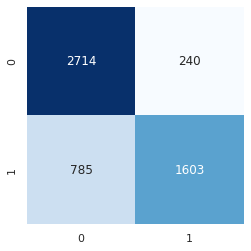

In [ ]:
#Matrix of confusion

cm = confusion_matrix(y_test,y_predict)
sns.heatmap(cm, square=True, annot=True, cmap='Blues', fmt='d', cbar=False);

In [ ]:
X

In [ ]:
exemple=[{'article_link':''},{'article_link',''}]

In [ ]:
data

[{'article_link': 'https://www.huffingtonpost.com/entry/versace-black-code_us_5861fbefe4b0de3a08f600d5',
  'headline': "former versace store clerk sues over secret 'black code' for minority shoppers",
  'is_sarcastic': 0},
 {'article_link': 'https://www.huffingtonpost.com/entry/roseanne-revival-review_us_5ab3a497e4b054d118e04365',
  'headline': "the 'roseanne' revival catches up to our thorny political mood, for better and worse",
  'is_sarcastic': 0},
 {'article_link': 'https://local.theonion.com/mom-starting-to-fear-son-s-web-series-closest-thing-she-1819576697',
  'headline': "mom starting to fear son's web series closest thing she will have to grandchild",
  'is_sarcastic': 1},
 {'article_link': 'https://politics.theonion.com/boehner-just-wants-wife-to-listen-not-come-up-with-alt-1819574302',
  'headline': 'boehner just wants wife to listen, not come up with alternative debt-reduction ideas',
  'is_sarcastic': 1},
 {'article_link': 'https://www.huffingtonpost.com/entry/jk-rowling-w